           df      sum_sq     mean_sq          F    PR(>F)
School    2.0  480.166667  240.083333  26.190909  0.000177
Residual  9.0   82.500000    9.166667        NaN       NaN 


   School  Height  Mean_Height
0       A     165       168.75
1       A     170       168.75
2       A     172       168.75
3       A     168       168.75
4       B     175       178.75
5       B     180       178.75
6       B     182       178.75
7       B     178       178.75
8       C     160       163.50
9       C     165       163.50
10      C     167       163.50
11      C     162       163.50 


F-Statistic: 26.190909090909088
p-Value: 0.00017697520513924124
Reject the null hypothesis (H0). There is a significant difference between group means. 




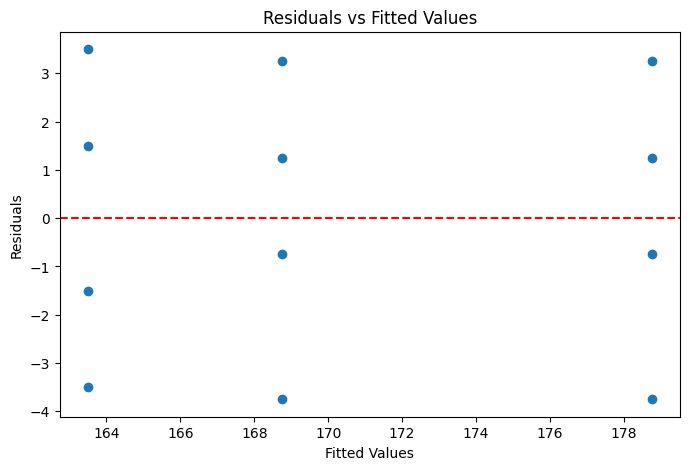

In [3]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Create a DataFrame from the data
data = {
    'School': ['A'] * 4 + ['B'] * 4 + ['C'] * 4,
    'Height': [165, 170, 172, 168, 175, 180, 182, 178, 160, 165, 167, 162]
}
df = pd.DataFrame(data)

# Fit the ANOVA model
model = ols('Height ~ School', data=df).fit()
anova_table = sm.stats.anova_lm(model)

# model = ols('Height ~ School', data=df).fit(): 
# Fits an Ordinary Least Squares regression model where 'Height' is the dependent variable 
# and 'School' is the independent variable.


# anova_table = sm.stats.anova_lm(model): 
# Performs ANOVA (Analysis of Variance) on the fitted model to analyze the differences between group means.


# Print the ANOVA table
print(anova_table,"\n\n")


# In the context of regression analysis, including ANOVA, 

# a Residual is the difference between the observed value and the predicted value 
# of the dependent variable (in your case, Height). Residuals are crucial for 
# diagnosing how well your model fits the data.

# i = a - b

# a is the observed value
# b is the predicted value from the model

# Access predicted values
Mean_values = model.fittedvalues

# Add predicted values to the DataFrame for better clarity
df['Mean_Height'] = Mean_values

print(df,"\n\n")



#-------------------------------------------------------------------------------------------------------------------------------------



# Get the F-statistic and p-value using .iloc
f_statistic = anova_table.iloc[0]['F']
p_value = anova_table.iloc[0]['PR(>F)']

# Set significance level
alpha = 0.05

# Make decision
if p_value <= alpha:
    decision = "Reject the null hypothesis (H0). There is a significant difference between group means."
else:
    decision = "Fail to reject the null hypothesis (H0). There is no significant difference between group means."

print(f"F-Statistic: {f_statistic}")
print(f"p-Value: {p_value}")
print(decision,"\n\n")

# ----------------------------------------------------------------------
import matplotlib.pyplot as plt

# Calculate residuals
residuals = model.resid

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
